In [1]:
import pandas as pd
df = pd.read_csv("./mobile.csv")
df.head()

,abc,company,text,airline_sentiment
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,I feel so LUCKY to have found this used (phone...,positive
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,"nice phone, nice up grade from my pantach revu...",positive
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,Very pleased,positive
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,It works good but it goes slow sometimes but i...,positive
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,Great phone to replace my lost phone. The only...,positive


In [2]:
review_df = df[['text','airline_sentiment']]

print(review_df.shape)
review_df.head(5)

(64710, 2)


,text,airline_sentiment
0,I feel so LUCKY to have found this used (phone...,positive
1,"nice phone, nice up grade from my pantach revu...",positive
2,Very pleased,positive
3,It works good but it goes slow sometimes but i...,positive
4,Great phone to replace my lost phone. The only...,positive


In [3]:
# review_df = review_df[review_df['airline_sentiment'] != 'neutral']

# print(review_df.shape)
# review_df.head(5)

(58327, 2)


,text,airline_sentiment
0,I feel so LUCKY to have found this used (phone...,positive
1,"nice phone, nice up grade from my pantach revu...",positive
2,Very pleased,positive
3,It works good but it goes slow sometimes but i...,positive
4,Great phone to replace my lost phone. The only...,positive


In [3]:
review_df["airline_sentiment"].value_counts()

positive    44526
negative    13801
neutral      6383
Name: airline_sentiment, dtype: int64

In [4]:
sentiment_label = review_df.airline_sentiment.factorize()
sentiment_label

(array([0, 0, 0, ..., 0, 1, 0], dtype=int64),
 Index(['positive', 'negative', 'neutral'], dtype='object'))

In [5]:
tweet = review_df.text.values
tweet

array(["I feel so LUCKY to have found this used (phone to us & not used hard at all), phone on line from someone who upgraded and sold this one. My Son liked his old one that finally fell apart after 2.5+ years and didn't want an upgrade!! Thank you Seller, we really appreciate it & your honesty re: said used phone.I recommend this seller very highly & would but from them again!!",
       'nice phone, nice up grade from my pantach revue. Very clean set up and easy set up. never had an android phone but they are fantastic to say the least. perfect size for surfing and social media. great phone samsung',
       'Very pleased', ...,
       'I am enjoying my new phone when leaving the country I could even switch carriers because it is really unlock. Thanks again Jack',
       "I don't know what do me. I ordered Blackberry Storm2 9550 Unlocked Phone ,but received Blackberry Storm2 9550 Verizon. I live in Russia and we have GSM format. With my sim card require Activation Required. Will be re

In [6]:
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words=5000)

tokenizer.fit_on_texts(tweet)

In [7]:
print(tokenizer.word_index)

{'the': 1, 'i': 2, 'it': 3, 'and': 4, 'phone': 5, 'a': 6, 'to': 7, 'is': 8, 'was': 9, 'this': 10, 'with': 11, 'for': 12, 'in': 13, 'not': 14, 'my': 15, 'of': 16, 'but': 17, 'that': 18, 'on': 19, 'great': 20, 'as': 21, 'very': 22, 'have': 23, 'you': 24, 'new': 25, 'so': 26, 'good': 27, 'iphone': 28, 'had': 29, 'no': 30, 'all': 31, 'works': 32, 'me': 33, 'at': 34, 'from': 35, 'be': 36, 'like': 37, 'one': 38, 'just': 39, 'an': 40, 'when': 41, 'screen': 42, 'product': 43, 'or': 44, "it's": 45, 'they': 46, 'would': 47, 'has': 48, 'use': 49, 'if': 50, 'time': 51, 'work': 52, 'battery': 53, 'love': 54, 'came': 55, 'are': 56, 'apple': 57, 'get': 58, 'got': 59, 'only': 60, 'will': 61, 'than': 62, 'can': 63, 'bought': 64, 'up': 65, 'am': 66, 'condition': 67, 'buy': 68, 'price': 69, 'because': 70, 'out': 71, 'about': 72, 'seller': 73, 'what': 74, 'sim': 75, 'unlocked': 76, 'perfect': 77, 'after': 78, 'really': 79, 'do': 80, 'used': 81, 'its': 82, 'well': 83, "i'm": 84, 'back': 85, 'card': 86, 'no

In [8]:
vocab_size = len(tokenizer.word_index) + 1
encoded_docs = tokenizer.texts_to_sequences(tweet)
print(tweet[0])
print(encoded_docs[0])

I feel so LUCKY to have found this used (phone to us & not used hard at all), phone on line from someone who upgraded and sold this one. My Son liked his old one that finally fell apart after 2.5+ years and didn't want an upgrade!! Thank you Seller, we really appreciate it & your honesty re: said used phone.I recommend this seller very highly & would but from them again!!
[2, 345, 26, 1674, 7, 23, 299, 10, 81, 5, 7, 371, 14, 81, 405, 34, 31, 5, 19, 660, 35, 436, 245, 839, 4, 439, 10, 38, 15, 380, 712, 399, 197, 38, 18, 510, 1129, 1161, 78, 113, 105, 315, 4, 131, 176, 40, 349, 155, 24, 73, 126, 79, 1275, 3, 123, 2523, 1012, 156, 81, 5, 2, 121, 10, 73, 22, 368, 47, 17, 35, 136, 143]


In [9]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

padded_sequence = pad_sequences(encoded_docs, maxlen=200)

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense, Dropout, SpatialDropout1D
from tensorflow.keras.layers import Embedding


embedding_vector_length = 32
model = Sequential()
model.add(Embedding(vocab_size, embedding_vector_length, input_length=200))
model.add(SpatialDropout1D(0.25))
model.add(LSTM(50, dropout=0.5, recurrent_dropout=0.5))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 32)           675552    
                                                                 
 spatial_dropout1d (SpatialD  (None, 200, 32)          0         
 ropout1D)                                                       
                                                                 
 lstm (LSTM)                 (None, 50)                16600     
                                                                 
 dropout (Dropout)           (None, 50)                0         
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 692,203
Trainable params: 692,203
Non-trainable params: 0
__________________________________________________

In [11]:
history = model.fit(padded_sequence,sentiment_label[0],validation_split=0.2, epochs=2, batch_size=32)

Epoch 1/2
1618/1618 [==============================] - 325s 199ms/step - loss: -2.1366 - accuracy: 0.7386 - val_loss: -1.6682 - val_accuracy: 0.7374
Epoch 2/2
1618/1618 [==============================] - 322s 199ms/step - loss: -9.3365 - accuracy: 0.7558 - val_loss: -4.8818 - val_accuracy: 0.7523


In [18]:
print(history.history)

{'loss': [-2.136551856994629, -9.336494445800781], 'accuracy': [0.7386223077774048, 0.7558143734931946], 'val_loss': [-1.6682052612304688, -4.8817596435546875], 'val_accuracy': [0.7374439835548401, 0.7522794008255005]}


In [16]:
def predict_sentiment(text):
    tw = tokenizer.texts_to_sequences([text])
    tw = pad_sequences(tw,maxlen=200)
    prediction = int(model.predict(tw).round().item())
    print("Predicted label: ", sentiment_label[1][prediction])


test_sentence1 = "I couldn't hear the caller properly because the earpiece volume was too low."
print('Review: ',test_sentence1)
predict_sentiment(test_sentence1)

test_sentence2 = "The camera captures amazing landscape and portrait shots with excellent color accuracy"
print('Review: ',test_sentence2)
predict_sentiment(test_sentence2)


Review:  It was decent
1/1 [==============================] - 0s 31ms/step
Predicted label:  negative
Review:  The camera captures amazing landscape and portrait shots with excellent color accuracy
1/1 [==============================] - 0s 65ms/step
Predicted label:  positive


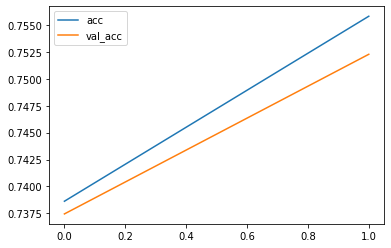

<Figure size 432x288 with 0 Axes>

In [13]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()

plt.savefig("Accuracy plot2.jpg")

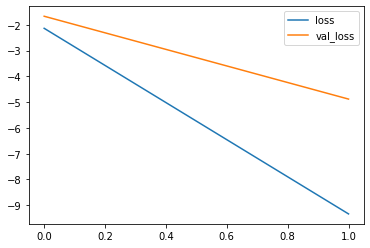

<Figure size 432x288 with 0 Axes>

In [14]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')

plt.legend()
plt.show()

plt.savefig("Loss plt2.jpg")

2023/2023 [==============================] - 56s 28ms/step


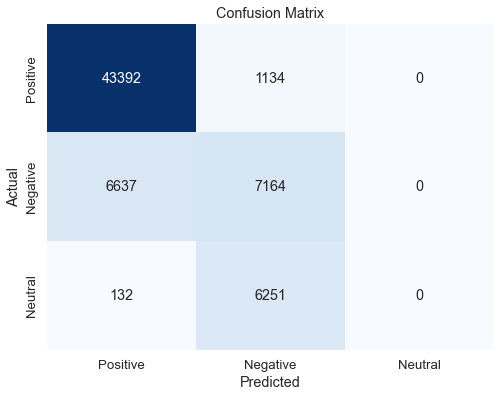

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
predictions = (model.predict(padded_sequence) > 0.5).astype("int32")  # Convert probabilities to binary predictions

# Calculate the confusion matrix
conf_matrix = confusion_matrix(sentiment_label[0], predictions)

# Visualize the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap="Blues", cbar=False,
            xticklabels=['Positive','Negative','Neutral'],
            yticklabels=['Positive','Negative','Neutral'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.savefig("Confusion_Matrix.png")  # Save the confusion matrix as an image
plt.show()

In [24]:
from sklearn.metrics import classification_report

# Get classification report
report = classification_report(sentiment_label[0], predictions, 
                              target_names=['Positive','Negative','Neutral'])

# Print report
print(report)

              precision    recall  f1-score   support

    Positive       0.95      0.98      0.96     44526
    Negative       0.93      0.82      0.87     13801

    accuracy                           0.94     58327
   macro avg       0.94      0.90      0.92     58327
weighted avg       0.94      0.94      0.94     58327

